# Stroke Data Analysis

Dataset source:https://www.kaggle.com/fedesoriano/stroke-prediction-dataset  
Note: A copy of this dataset is saved as healthcare-dataset-stroke-data.csv

For this project we will be working with data from the following feilds:    
* Gender  
* Age  
* BMI
* Marital Status
* Work Type  
* Heart Disease  
* Stroke  

This data will help up predict the probablity of another person having a stroke given their information. 

In [16]:
import importlib
import utils
from mypytable import MyPyTable 

original_data_table = utils.read_csv("healthcare-dataset-stroke-data.csv")
header = original_data_table.pop(0)
print(header)


['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


### Attribute Selection  

We selected these attributes to use from the data set because we could identify the largest correclations between those upon inital scanning throug the set. 

While grabbing the inital columns for these attributes we wanted to make sure to keep them all the same length and raw so that we can make sure to keep every persons profiles intact across the columns. For this we used a simple function to grab the entire column without cleaning out and NA values so we can send them into a new file. 

In [17]:
selected_cols = ['gender', 'age', 'heart_disease', 'ever_married', 'work_type', 'bmi', 'stroke']
selected_data = []
gender_col = utils.get_col_no_clean(original_data_table, header, "gender")
selected_data.append(gender_col)
age_col =  utils.get_col_no_clean(original_data_table, header, "age")
selected_data.append(age_col)
heart_disease_col =  utils.get_col_no_clean(original_data_table, header, "heart_disease")
selected_data.append(heart_disease_col)
married_col = utils.get_col_no_clean(original_data_table, header, "ever_married")
selected_data.append(married_col)
work_type_col = utils.get_col_no_clean(original_data_table, header, "work_type")
selected_data.append(work_type_col)
bmi_col = utils.get_col_no_clean(original_data_table, header, "bmi")
selected_data.append(bmi_col)
stroke_col = utils.get_col_no_clean(original_data_table, header, "stroke")
selected_data.append(stroke_col)

stroke_data = MyPyTable(selected_cols,selected_data)


We will use a frequency diagram to look at ditrubutions within the dataset to being understanding it further.

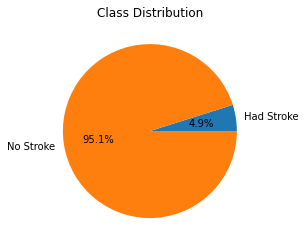

Number of datapoints:  5110
Number Had Stroke:  249.0
Number Did Not Have Stroke:  4861.0


In [12]:
importlib.reload(utils)
import plot_utils

title = "Class Distribution"
utils.convert_to_numeric(stroke_col)
stroke_vals = ["Had Stroke", "No Stroke"]
percents = []
num_strokes = sum(stroke_cleaned)

num_entries = len(stroke_cleaned)
num_no_strokes = num_entries - num_strokes


stroke_percent = num_strokes / num_entries
percents.append(stroke_percent)
no_stroke_percent = num_no_strokes / num_entries
percents.append(no_stroke_percent)

plot_utils.pie_chart(stroke_vals, percents, title)

print("Number of data entries: ", num_entries)
print("Number Had Stroke: ", num_strokes)
print("Number Did Not Have Stroke: ", num_no_strokes)



### Class Imbalance

As shown in the distribution pie chart, the class distribution is extremely skewed to the non-stoke side where there are 4,861 cases of no stroke compared to 249 cases that resulted in stroke. While this is good news that there were not nearly as many people that had a stroke, this is something we will have to be very careful with throughout the rest of our data exploration and classifications.